## Density matrices and Krauss operators

In [52]:
from sympy import *
from sympy.physics.quantum.qubit import Qubit,matrix_to_qubit,represent,matrix_to_density
from sympy.physics.quantum import TensorProduct,Dagger


In [53]:
r=symbols('r_{x} r_{y} r_{z}',real=True)

The qubit density matrix is usually express in terms of the pauli matrices as 

$\rho=\frac{\mathcal{1}}{2}+ \vec{r}. \vec{\sigma}$

**Task** Define such a density matrix, and repeat the analysis from last lesson to see under which conditions it is valid, and pure

We recently took a look at the amplitud damping channel

\begin{equation}
E_{0}=\begin{pmatrix}
1 & 0 \\ 0 & \sqrt{1-\lambda}
\end{pmatrix}
\end{equation}

\begin{equation}
E_{1}=\begin{pmatrix}
0 & \sqrt{\lambda}  \\ 0&0
\end{pmatrix}
\end{equation}

**Task**:How does this map affect the qubit density matrix? use a for loop for the inner product or a vector of matrices (using symbols), and verify that $\sum_{k}^{n}E_{k}^{\dagger}E_{k}=\mathcal{I}$

In [54]:
X=Matrix([[0,1],[1,0]])
Y=Matrix([[0,-I],[I,0]])
Z=Matrix([[1,0],[0,-1]])
λ=symbols('λ', real=True)
E0=Matrix([[1,0],[0,sqrt(1-λ)]])
E1=Matrix([[0,sqrt(λ)],[0,0]])


In [55]:
(Dagger(E0)*E0+Dagger(E1)*E1).subs({conjugate(sqrt(λ)):sqrt(λ),conjugate(sqrt(1-λ)):sqrt(1-λ)}).expand()# Checking they satisfy it

Matrix([
[1, 0],
[0, 1]])

In [56]:
σ=[X,Y,Z]
var=[r[i]*σ[i] for i in range(0,len(r))]
P=(eye(2)/2)
for i in var:
    P+=i/2
P

Matrix([
[      r_{z}/2 + 1/2, r_{x}/2 - I*r_{y}/2],
[r_{x}/2 + I*r_{y}/2,       1/2 - r_{z}/2]])

In [67]:
var1=E0*P*Dagger(E0)+E1*P*Dagger(E1)
var1=var1.subs({conjugate(sqrt(λ)):sqrt(λ),conjugate(sqrt(1-λ)):sqrt(1-λ)}).expand()
var1

Matrix([
[           -r_{z}*λ/2 + r_{z}/2 + λ/2 + 1/2, r_{x}*sqrt(1 - λ)/2 - I*r_{y}*sqrt(1 - λ)/2],
[r_{x}*sqrt(1 - λ)/2 + I*r_{y}*sqrt(1 - λ)/2,             r_{z}*λ/2 - r_{z}/2 - λ/2 + 1/2]])

We can see this map as a linear transformation from $\vec{r}$ to $\vec{r'}$

$\vec{r'}=A \vec{r} + \vec{b}$


In [147]:
linear_eqs=[(var1[0,1]+var1[1,0]),I*(var1[0,1]-var1[1,0]),2*(var1[0,0]-1/2)]

In [148]:
r[2]

r_{z}

In [149]:
A,b=linear_eq_to_matrix(linear_eqs,[r[0],r[1],r[2]])

In [150]:
(A*Matrix(list(r))-b).expand()

Matrix([
[   r_{x}*sqrt(1 - λ)],
[   r_{y}*sqrt(1 - λ)],
[-r_{z}*λ + r_{z} + λ]])

In [151]:
A

Matrix([
[sqrt(1 - λ),           0,     0],
[          0, sqrt(1 - λ),     0],
[          0,           0, 1 - λ]])

In [153]:
-b

Matrix([
[0],
[0],
[λ]])

So to visualize the effect of the amplitude damping channel we just need to modify the coordinates acording to

$$r_{x}'=\sqrt{(1-\lambda)} r_{x} \\
r_{y}'=\sqrt{(1-\lambda)} r_{y} \\
r_{z}'=(1-\lambda) r_{z} + \lambda $$

When $\lambda=0$ tehn we have the same coordinates and thus no transformation we have the unit sphere

**Task** : Change the value of lambda and see how the map changes pure states, change lambda and r1 to see how it changes mixed states

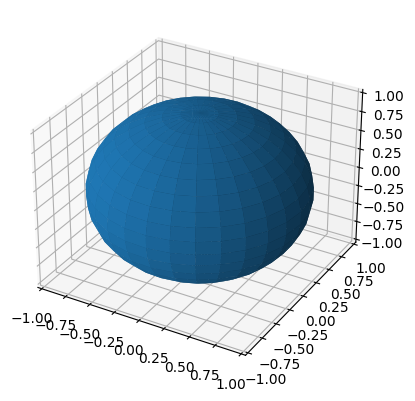

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
r1=1
u,v=np.mgrid[0:2*np.pi:30j,0:np.pi:20j]
lamda=0
x=r1*np.sqrt(1-lamda)*np.cos(u)*np.sin(v)
y=r1*np.sqrt(1-lamda)*np.sin(u)*np.sin(v)
z=r1*(1-lamda)*np.cos(v)+lamda
ax.plot_surface(x,y,z)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

# Task: Other Noise Channels


In this task used what you have learned so far to see the effects of other noise channels on a qubit, and visualize their effects on pure states, In this exercise $\sigma_{i}s$ denote the Pauli matrices


1. The bit flip channel that is given by

\begin{equation}
E_{0}= \sqrt{p} \mathcal{I}
\end{equation}

\begin{equation}
E_{1}=\sqrt{1-p} \sigma_x
\end{equation}

2. The Phase flip channel that is given by

\begin{equation}
E_{0}= \sqrt{p} \mathcal{I}
\end{equation}

\begin{equation}
E_{1}=\sqrt{1-p} \sigma_z
\end{equation}

3. The bit phase-flip channel

\begin{equation}
E_{0}= \sqrt{p} \mathcal{I}
\end{equation}

\begin{equation}
E_{1}=\sqrt{1-p} \sigma_y
\end{equation}

4. The depolarizing channel, The map has the form 

\begin{equation}
\mathcal{E} (\rho)=\frac{p\mathcal{I}}{2} + (1-p)\rho
\end{equation}

It can be represented in the operator sum representation in different ways, it can be implemented by different sum representations a convenient one is:

\begin{equation}
\mathcal{E} (\rho)=\frac{p}{3} (\sigma_{x} \rho \sigma_{x} +\sigma_{y} \rho \sigma_{y}+ \sigma_{z} \rho \sigma_{z}) + (1-p)\rho
\end{equation}

When you are done, you will have done most of what [Nielsen and Chuang's](http://mmrc.amss.cas.cn/tlb/201702/W020170224608149940643.pdf) chapter 8 covers!